In [1]:
from IPython.display import Markdown, display

display(Markdown("""
# **Loan Approval Prediction**

In today's fast-paced financial world, **loan approval** is a critical component of banking and lending operations. Traditionally, loan approvals rely heavily on manual assessments, where loan officers evaluate credit history, income levels, and personal factors to determine applicant eligibility. While effective in some cases, this manual approach can be:

- Time-consuming  
- Prone to human error  
- Inconsistent  
- Stressful for both applicants and institutions  

With advancements in **data analytics** and **machine learning**, financial institutions now have the opportunity to automate and optimize the loan approval process. Machine learning models can analyze large volumes of historical data to make decisions that are:

- Faster  
- More objective  
- More consistent  
- Highly accurate  

The main challenge is building a predictive system that balances the complexity of human financial behavior with real-world data patterns.

### **Objective**
The goal of the **Loan-Approval-Prediction system** is to develop a reliable, scalable, and automated model capable of predicting whether a loan application should be approved or rejected using historical and real-time data inputs.

### **Benefits**
Implementing such a system helps:

- Reduce decision-making time  
- Increase approval accuracy  
- Minimize biases  
- Improve fairness and transparency  
- Enhance customer satisfaction  

### **Dataset Link:**  
[Click here to access the dataset](https://drive.google.com/file/d/1n1I3hEcgN-YKycu174QRVXcqW2xmQk99/view)
"""))



# **Loan Approval Prediction**

In today's fast-paced financial world, **loan approval** is a critical component of banking and lending operations. Traditionally, loan approvals rely heavily on manual assessments, where loan officers evaluate credit history, income levels, and personal factors to determine applicant eligibility. While effective in some cases, this manual approach can be:

- Time-consuming  
- Prone to human error  
- Inconsistent  
- Stressful for both applicants and institutions  

With advancements in **data analytics** and **machine learning**, financial institutions now have the opportunity to automate and optimize the loan approval process. Machine learning models can analyze large volumes of historical data to make decisions that are:

- Faster  
- More objective  
- More consistent  
- Highly accurate  

The main challenge is building a predictive system that balances the complexity of human financial behavior with real-world data patterns.

### **Objective**
The goal of the **Loan-Approval-Prediction system** is to develop a reliable, scalable, and automated model capable of predicting whether a loan application should be approved or rejected using historical and real-time data inputs.

### **Benefits**
Implementing such a system helps:

- Reduce decision-making time  
- Increase approval accuracy  
- Minimize biases  
- Improve fairness and transparency  
- Enhance customer satisfaction  

### **Dataset Link:**  
[Click here to access the dataset](https://drive.google.com/file/d/1n1I3hEcgN-YKycu174QRVXcqW2xmQk99/view)


In [2]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Loading the dataset
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Data Preprocessing</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This step involves preparing the dataset for analysis by cleaning data, removing inconsistencies, handling missing values, transforming features, and ensuring data quality for accurate modeling.
</p>
"""))


In [4]:
# Checking the shape of the dataset
df.shape

(4269, 13)

In [5]:
# df.drop(columns='loan_id', inplace=True) 
 

In [6]:
# Checking for null/missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# Checking the data types of the columns
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
from IPython.display import display, HTML

display(HTML("""
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The dataset includes <b>four categories of assets</b>: 
<b>Residential</b>, <b>Commercial</b>, <b>Luxury</b>, and <b>Bank</b>.
</p>
"""))


In [9]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [10]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [11]:
from IPython.display import display, HTML

display(HTML("""
<h1 style='color:#2c3e50; text-align:left;'>Descriptive Statistics</h1>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This section summarizes the main statistical characteristics of the dataset, including measures 
such as mean, median, mode, variance, standard deviation, range, and distribution insights.
</p>
"""))


In [12]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Problem Definition</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Loan approval prediction is a challenging problem due to the wide range of factors that determine an
applicant’s creditworthiness. Traditionally, loan officers evaluate criteria such as <b>credit score</b>,
<b>income level</b>, <b>age</b>, and <b>loan repayment history</b> to assess risk.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
However, this manual process often lacks objectivity and is prone to <b>human bias</b>, where subjective
judgments can lead to inconsistent or unfair decisions. Moreover, financial institutions receive a
large volume of loan applications, making it increasingly difficult for human evaluators to maintain
accuracy, speed, and fairness.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
These challenges highlight the need for a <b>data-driven, automated loan approval model</b> capable of improving
decision-making efficiency and reducing bias.
</p>
"""))


In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [14]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [15]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Problem Statement</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The primary objective of this case study is to develop an automated predictive model capable of accurately 
determining whether a loan application will be approved or rejected. The model should evaluate a wide range 
of features that significantly influence lending decisions:
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li><b>Demographic factors:</b> Age, marital status, education level, and employment status, which indicate financial stability and earning potential.</li>
    <li><b>Credit-related factors:</b> Credit score, outstanding debts, and credit history, reflecting how reliable an applicant has been in repaying past obligations.</li>
    <li><b>Financial factors:</b> Monthly income, loan amount, loan term, and debt-to-income ratio, showing the applicant’s ability to manage future financial commitments.</li>
    <li><b>Behavioral & socio-economic factors:</b> Housing situation, employment type, and lifestyle elements that influence long-term financial behavior.</li>
</ul>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Traditional loan approval processes rely heavily on the subjective judgment of loan officers, often leading to 
biased or inconsistent decisions. This project aims to eliminate such biases by building a machine learning 
model that ensures objective, fair, and data-driven decision-making.
</p>
"""))


In [16]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Exploratory Data Analysis (EDA)</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
In the exploratory data analysis, I will analyze the <b>distribution of data</b> across different variables, 
examine the <b>relationships</b> between independent variables and the target variable, and study the 
<b>correlation patterns</b> among the features. Visualizations will help uncover possible 
<b>trends, patterns, and hidden insights</b> within the dataset.
</p>

<h3 style='color:#2c3e50;'>Number of Dependents</h3>
"""))


Text(0.5, 1.0, 'Number of Dependents')

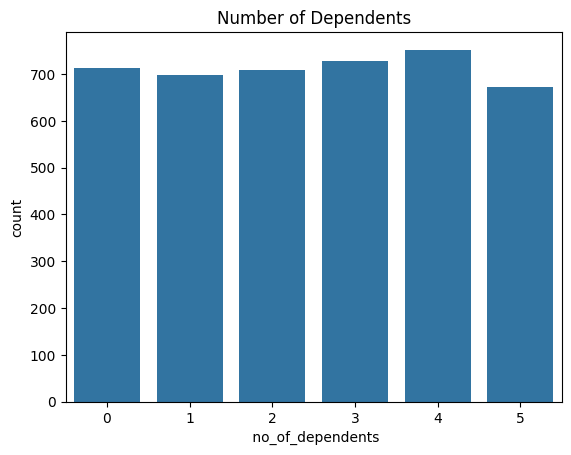

In [17]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

In [18]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Dependents vs Loan Approval</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The graph illustrates the number of dependent individuals associated with each loan applicant.  
Although the distribution does not show major differences across categories, applicants with 
<b>3 or 4 dependents</b> appear slightly more frequently. As the number of dependents increases, the 
applicant's <b>disposable income</b> generally decreases. Therefore, applicants with <b>0 or 1 dependent</b> 
are likely to have better chances of loan approval due to stronger financial capacity.
</p>

<h2 style='color:#2c3e50;'>Education and Income</h2>
"""))


<Axes: xlabel=' education', ylabel=' income_annum'>

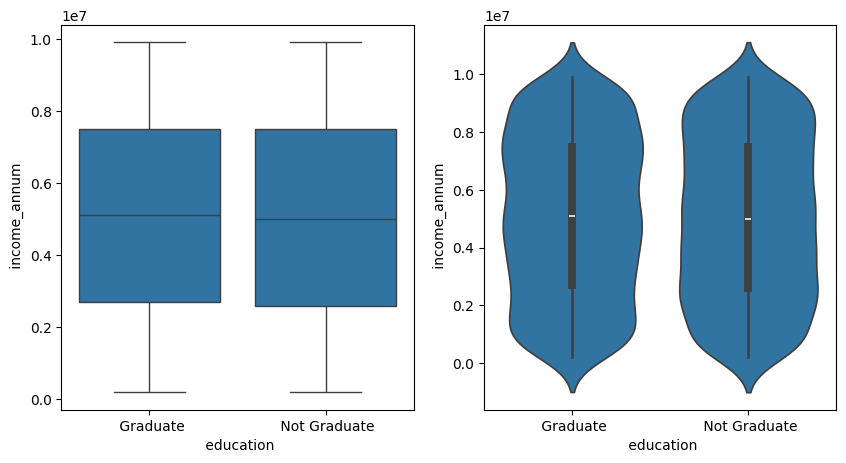

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

In [20]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Education vs Annual Income Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The boxplot and violinplot together illustrate how the education level of applicants
relates to their annual income.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The <b>boxplot</b> shows that graduates and non-graduates have nearly the same median income,
with only a very small increase for graduates. This suggests that education level
does not strongly influence income levels in this dataset.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The <b>violinplot</b> highlights the income distribution: non-graduates exhibit an
even spread between ₹2,000,000 and ₹8,000,000, while graduates show an uneven distribution,
with a larger concentration between ₹6,000,000 and ₹8,000,000.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Since the annual income distribution for both groups is broadly similar, it suggests that
<b>education may not be a major factor</b> influencing loan approval outcomes.
</p>

<h3 style='color:#2c3e50;'>Employment Status and Education</h3>
"""))


Text(0.5, 1.0, 'Self Employed')

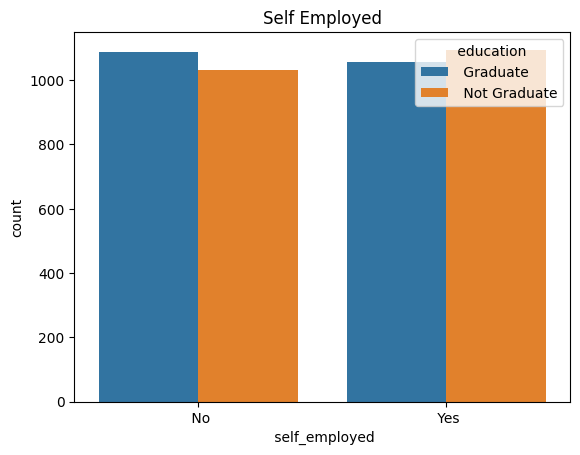

In [21]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

In [22]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Self-Employment vs Education Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This graph illustrates the number of self-employed applicants along with their education level.
The majority of <b>graduates</b> are not self-employed, whereas the majority of <b>non-graduates</b>
are self-employed.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This indicates that graduates tend to be <b>salaried employees</b>, while non-graduates are more likely
to be <b>self-employed</b>. This can be a key factor in loan approvals because salaried employees often have
more predictable and stable incomes, making them more likely to repay loans.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
However, it is also possible that some self-employed individuals earn more than salaried workers, making
them equally or more capable of repayment. Thus, employment type combined with education level becomes
an important variable in loan approval prediction.
</p>

<h2 style='color:#2c3e50;'>Loan Amount and Tenure</h2>
"""))


Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

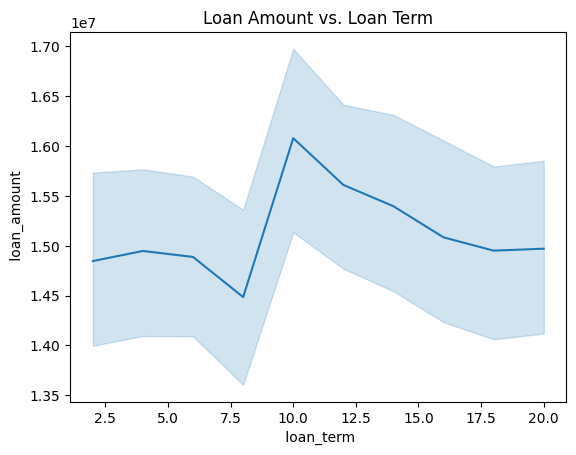

In [23]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

In [24]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Amount vs Loan Tenure Trend</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The line plot shows the relationship between the <b>loan amount</b> and <b>loan tenure</b>. 
For loan tenures between <b>2.5 and 7.5 years</b>, the loan amount ranges from <b>1,400,000 to 15,500,000</b>. 
However, for a <b>10-year</b> tenure, the loan amount increases significantly, indicating 
a clear upward trend in borrowing for longer repayment periods.
</p>

<h2 style='color:#2c3e50;'>CIBIL Score Distribution</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This section visualizes the distribution of <b>CIBIL Scores</b> among applicants, providing insights 
into their creditworthiness and overall financial behavior.
</p>
"""))


<Axes: xlabel=' cibil_score', ylabel='Count'>

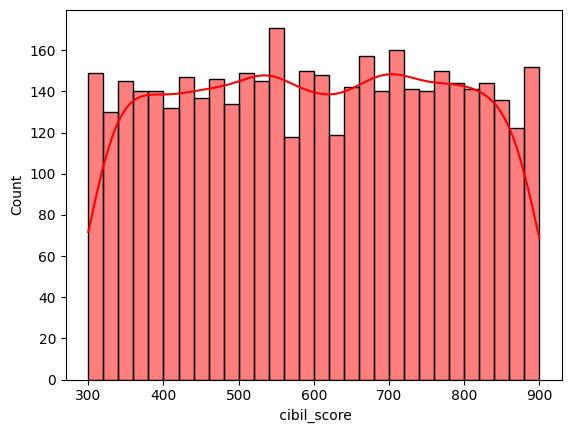

In [25]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

In [26]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>CIBIL Score Interpretation</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Before analyzing customer CIBIL scores, it is important to understand the score ranges and their meaning.
</p>

<table style='border-collapse: collapse; width: 60%; font-size:15px;'>
<tr><th style='border:1px solid #444; padding:8px;'>CIBIL Score</th>
<th style='border:1px solid #444; padding:8px;'>Meaning</th></tr>

<tr><td style='border:1px solid #444; padding:8px;'>300–549</td><td style='border:1px solid #444; padding:8px;'>Poor</td></tr>
<tr><td style='border:1px solid #444; padding:8px;'>550–649</td><td style='border:1px solid #444; padding:8px;'>Fair</td></tr>
<tr><td style='border:1px solid #444; padding:8px;'>650–749</td><td style='border:1px solid #444; padding:8px;'>Good</td></tr>
<tr><td style='border:1px solid #444; padding:8px;'>750–799</td><td style='border:1px solid #444; padding:8px;'>Very Good</td></tr>
<tr><td style='border:1px solid #444; padding:8px;'>800–900</td><td style='border:1px solid #444; padding:8px;'>Excellent</td></tr>
</table>

<p style='font-size:15px; line-height:1.7; text-align:justify; margin-top:10px;'>
According to this classification, most customers have a CIBIL score <b>below 649</b>, which reduces the likelihood of their loan being approved.  
However, many applicants also have scores <b>above 649</b>, which is beneficial for the bank.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
These customers can be targeted with priority services, special offers, and customized loan products to encourage healthy borrowing.
</p>

<h3 style='color:#2c3e50;'>Hypothesis</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Customers with a CIBIL score above <b>649</b> are more likely to have their loan approved.
</p>

<h2 style='color:#2c3e50;'>Asset Distribution</h2>
"""))


CIBIL Score,Meaning
300–549,Poor
550–649,Fair
650–749,Good
750–799,Very Good
800–900,Excellent


<Axes: xlabel='Immovable_assets', ylabel='Count'>

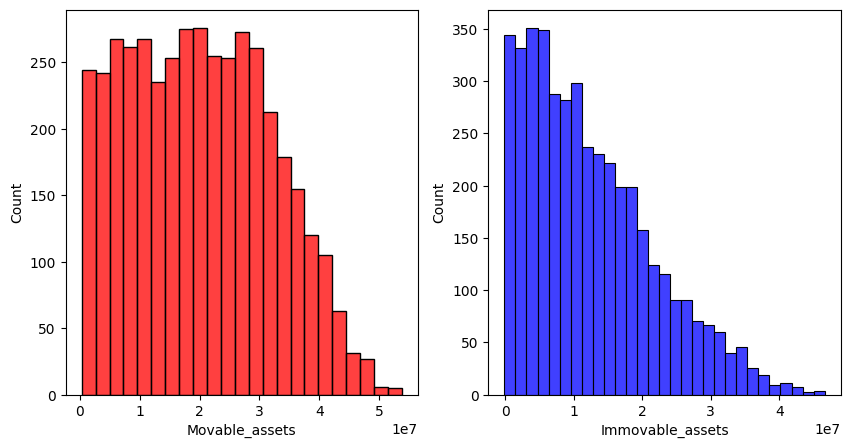

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')


In [28]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Assets and Loan Application Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Assets play a major role in loan applications as they provide security to the bank that the applicant will repay the loan. 
Assets in the dataset are categorized into <b>movable</b> and <b>immovable</b> types. The graphs above illustrate their distributions.
</p>

<h3 style='color:#2c3e50;'>Movable Assets</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Movable assets include bank assets and luxury assets. The majority of applicants possess less than 30 million, 
with a slight decreasing trend as movable assets increase.
</p>

<h3 style='color:#2c3e50;'>Immovable Assets</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Immovable assets include residential and commercial properties. Most applicants hold less than 15 million, 
and a strong decreasing trend is observed after 20 million.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Up to this point in the EDA, I have explored the distribution of data as well as relationships between several variables 
and formed initial assumptions and hypotheses. To validate these hypotheses, I will now examine visualizations that explore 
the relationship between independent variables and the target variable.
</p>

<h2 style='color:#2c3e50;'>Number of Dependants vs Loan Status</h2>
"""))


<Axes: xlabel=' no_of_dependents', ylabel='count'>

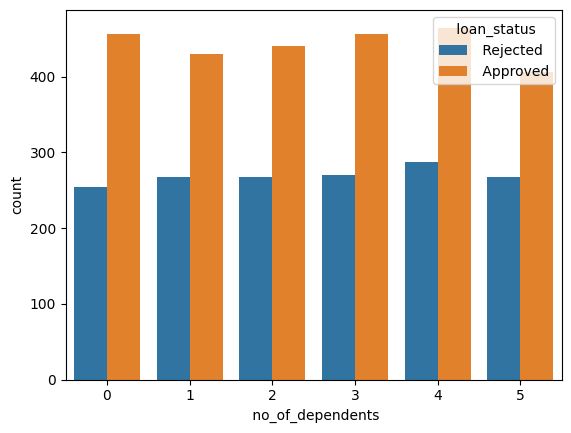

In [29]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

In [30]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Hypothesis Analysis: Loan Approval vs Number of Dependents</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
My hypothesis regarding loan approval based on the number of dependents shows mixed outcomes.
Initially, I believed that loan rejection rates would increase with more dependents, while loan
approval rates would decrease. The results partially support this idea.
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li>The hypothesis was <b>correct</b> regarding rejection chances. Loan rejections increase as the number of dependents increases.</li>
    <li>The hypothesis was <b>not correct</b> regarding approvals. Approval counts do not significantly decrease with more dependents.</li>
</ul>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Based on the graph, there is <b>no major change</b> in loan approval numbers as dependents increase.
This means the hypothesis is <b>not supported</b> for loan approvals.
</p>

<h3 style='color:#2c3e50;'>Education vs Loan Status</h3>
"""))


Text(0.5, 1.0, 'Loan Status by Education')

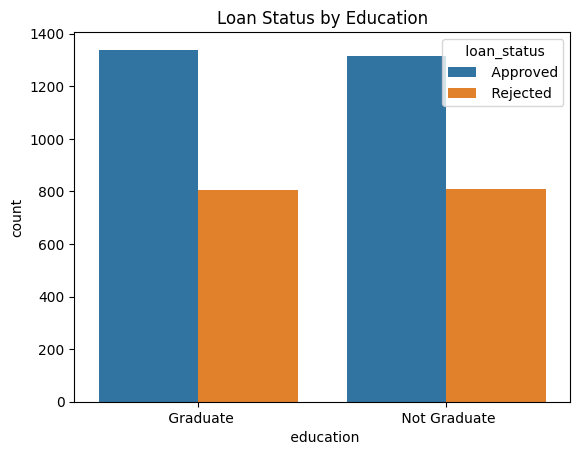

In [31]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

In [32]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Education vs Loan Approval</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
My hypothesis that <b>education is not a significant factor</b> in loan approval was correct.
The visualization indicates only a <b>minor difference</b> in approval and rejection counts between
graduate and non-graduate applicants. This difference is too small to be considered meaningful.
</p>

<hr>

<h2 style='color:#2c3e50;'>Annual Income vs Loan Status</h2>
"""))


<Axes: xlabel=' loan_status', ylabel=' income_annum'>

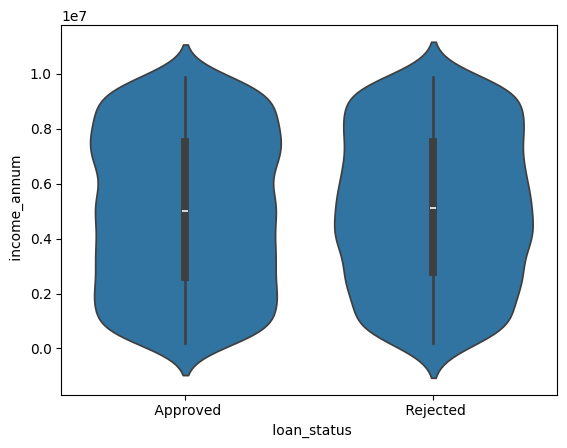

In [33]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

In [34]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Analysis Insights</h2>

<h3 style='color:#2c3e50;'>Annual Income vs Loan Status</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Overall, there is no major difference in the annual incomes of applicants whose loans were approved versus rejected.
However, applicants with <b>approved loans</b> generally have <b>slightly higher annual incomes</b>. 
This is evident from the violin plot, where approved applicants show a higher density around the 
<b>8 million annual income range</b>.
</p>

<h3 style='color:#2c3e50;'>Loan Amount & Tenure vs Loan Status</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Comparing loan amount and tenure with loan status provides further insight into how approval decisions vary 
based on the requested amount and repayment duration. These relationships help identify patterns in lending behavior 
and applicant eligibility.
</p>
"""))


<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

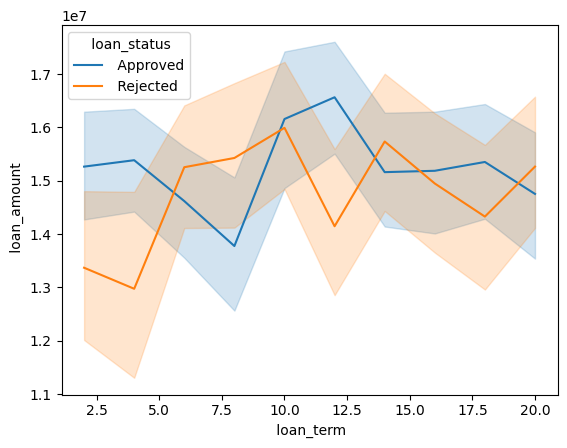

In [35]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

In [36]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Amount, Tenure, and Loan Status Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This graph shows the relationship between <b>loan amount</b>, <b>loan tenure</b>, and <b>loan status</b>.
Approved loans typically have <b>higher amounts</b> and <b>shorter repayment periods</b>, while rejected loans often
show <b>lower amounts</b> combined with <b>longer tenure</b>.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
These patterns may reflect the bank's policy of rejecting loans with long repayment periods due to higher risk.
The bank may also avoid very low loan amounts as they might not be sufficiently profitable.
</p>

<h2 style='color:#2c3e50;'>CIBIL Score vs Loan Status</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
(Add your explanation here after generating the visualization.)
</p>
"""))


<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

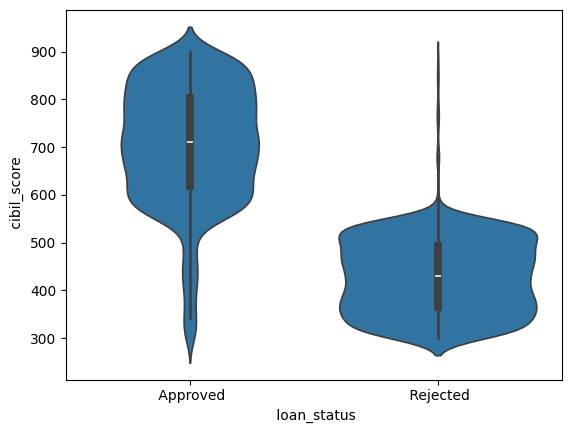

In [37]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

In [38]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>CIBIL Score vs Loan Approval</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
My hypothesis regarding the relationship between CIBIL score and loan approval is validated. The violin plot 
shows that applicants in the <b>loan approved</b> category generally have CIBIL scores <b>above 600</b>. 
Meanwhile, the <b>loan not approved</b> category displays a wider distribution, mostly below <b>550</b>.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This supports the assumption that most rejected applicants have <b>poor or fair</b> CIBIL scores, which 
negatively impacts their loan approval chances. Thus, maintaining a CIBIL score greater than <b>600</b> 
significantly increases the probability of approval.
</p>

<h2 style='color:#2c3e50;'>Assets vs Loan Status</h2>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
(Add your explanation about assets vs loan status here.)
</p>
"""))


<Axes: xlabel='Immovable_assets', ylabel='Count'>

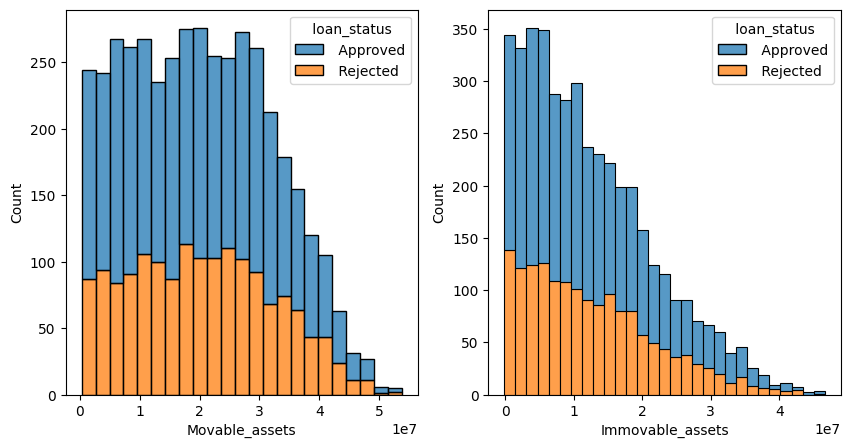

In [39]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

In [40]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Asset Analysis and Loan Approval</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Assets provide security to the bank against which the loan is issued.  
The two visualizations demonstrate the relationship between <b>movable</b> and <b>immovable assets</b> 
in relation to the loan approval status.
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li>Higher asset values are associated with a higher likelihood of loan approval.</li>
    <li>Loan rejection decreases as asset value increases.</li>
    <li>Movable assets are generally higher in value compared to immovable assets.</li>
</ul>

<h2 style='color:#2c3e50;'>Data Preprocessing — Step 2</h2>
<h3>Label Encoding the Categorical Variables</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Categorical variables are transformed into numerical values using <b>Label Encoding</b> 
to make the data suitable for machine learning models.
</p>
"""))


In [41]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Approval Prediction – Model Requirements & Benefits</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The model must be able to handle <b>missing or incomplete data</b>, as applicants may not always provide 
a full set of information. It should also adapt to the <b>dynamic nature of financial conditions</b>, 
adjusting predictions as an applicant's financial standing changes over time.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
By automating the loan approval process through machine learning, several objectives can be achieved:
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li><b>Increased efficiency:</b> Faster processing of applications, reducing waiting time.</li>
    <li><b>Improved accuracy:</b> Data-driven predictions reduce human bias and error.</li>
    <li><b>Enhanced fairness:</b> All applicants evaluated using consistent, objective criteria.</li>
    <li><b>Scalability:</b> Ability to manage large volumes of applications without increasing manpower.</li>
</ul>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
By building such a predictive model, the goal is to improve the loan decision-making process, 
ensure consistency and fairness, and strengthen the financial health of both institutions 
and their clients.
</p>
"""))


In [42]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [43]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,1,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,2,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,4,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [44]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50; text-align:left;'>Correlation Matrix Heatmap</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This heatmap displays the correlation values between numerical features.  
It helps identify patterns, strong relationships, and potential multicollinearity in the dataset.
</p>
"""))


<Axes: >

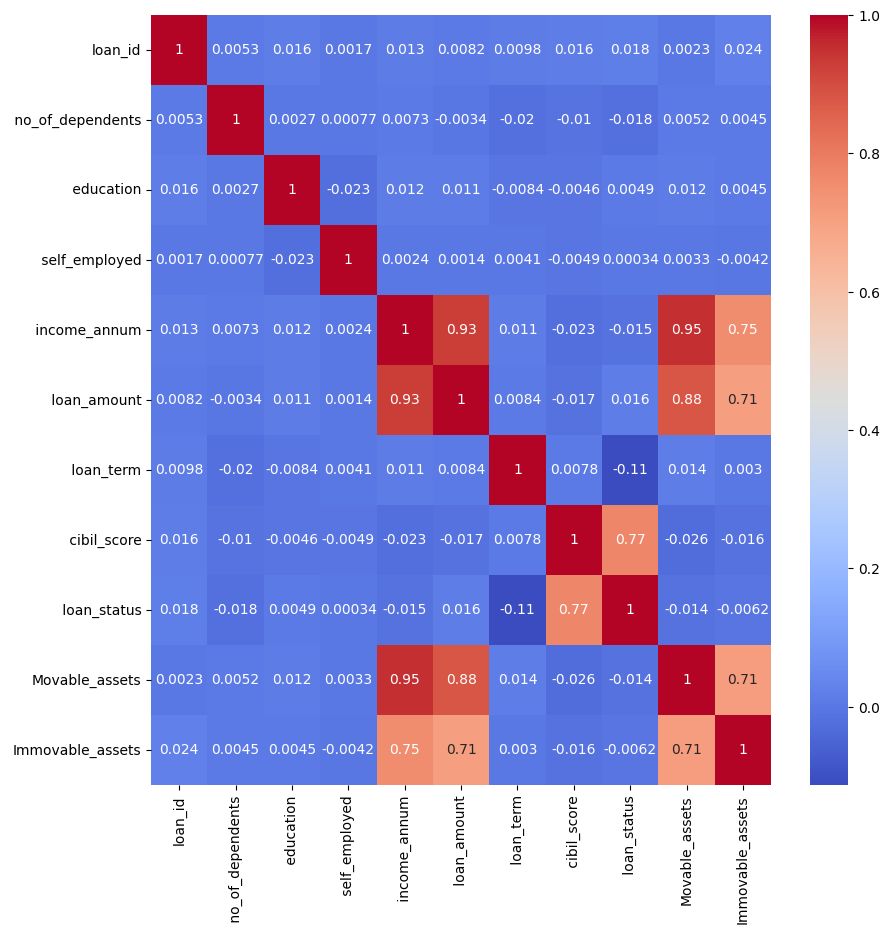

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

In [46]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Correlation Matrix Insights</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The correlation matrix reveals several strong relationships among key variables:
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li>Movable Assets and Immovable Assets</li>
    <li>Income and Movable Assets</li>
    <li>Income and Immovable Assets</li>
    <li>Movable Assets and Loan Amount</li>
    <li>Immovable Assets and Loan Amount</li>
    <li>Loan Status and Cibil Score</li>
    <li>Loan Amount and Income</li>
</ul>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The strong correlation between movable and immovable assets is expected, as both contribute to an individual's total wealth.
Similarly, higher income typically results in greater asset accumulation, justifying their observed correlations.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Next, the analysis will explore the correlation between <b>Assets and Loan Amount</b>, and between 
<b>Income and Loan Amount</b>. The relationship between <b>Loan Status</b> and <b>Cibil Score</b> was already 
examined in the previous section.
</p>
"""))


Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

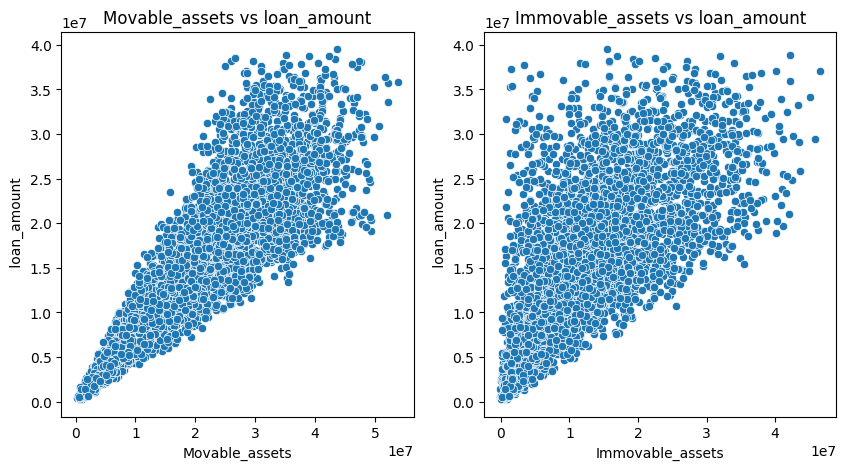

In [47]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

In [48]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Amount Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The loan amount shows a <b>positive relationship</b> with both movable and immovable assets.
This means that customers who possess more assets tend to receive higher loan amounts from the bank.
</p>

<h3 style='color:#2c3e50;'>Loan Amount vs Income</h3>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Analyzing loan amount versus income helps determine how borrowers' income levels influence the size 
of loans granted by the bank.
</p>
"""))


<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

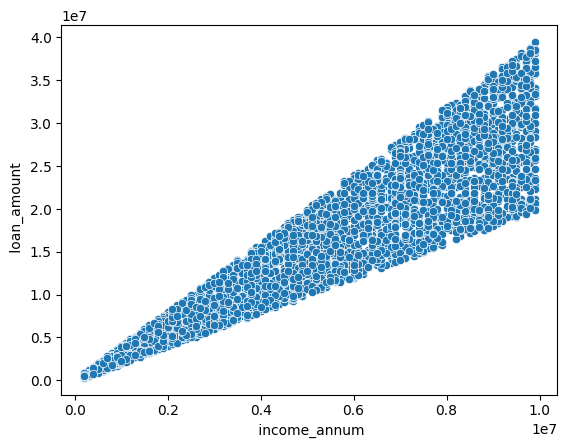

In [49]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

In [50]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Loan Amount vs Applicant Income</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
There is a strong and direct relationship between the applicant's annual income and the approved loan amount.
Higher income typically leads to eligibility for a higher loan because income significantly influences the 
loan requirement and repayment capability.
</p>

<h2 style='color:#2c3e50;'>Train–Test Split</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
To evaluate model performance, the dataset is divided into a <b>training set</b> and a <b>testing set</b>.
This approach ensures the model learns from one portion of the data and is validated on unseen data, 
providing a reliable measure of its prediction accuracy.
</p>
"""))


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [52]:
from IPython.display import HTML, display

display(HTML("""
<h2 style='color:#2c3e50;'>Model Building</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
To predict the <b>loan approval status</b>, the following machine learning models will be used:
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li><b>Decision Tree Classifier</b></li>
    <li><b>Random Forest Classifier</b></li>
    <li><b>Decision Tree Classifier</b> (duplicate — verify if intentional)</li>
</ul>

<p style='font-size:15px; line-height:1.7;'>
These models help identify important features and classify loan applications based on historical patterns.
</p>
"""))


In [53]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [54]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [56]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

In [57]:
from IPython.display import display, HTML

display(HTML("""
<h1 style='color:#2c3e50; text-align:center;'>Random Forest Classifier</h1>

<p style='font-size:16px; line-height:1.7; text-align:justify;'>
The <b>Random Forest Classifier</b> is a powerful ensemble learning algorithm that constructs multiple 
decision trees during training and outputs the class that represents the majority vote. It is widely used for 
classification tasks due to its robustness, high accuracy, and ability to handle nonlinear relationships.
</p>
"""))


In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [59]:
# Training the model using the training data
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [61]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [62]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Model Evaluation</h2>

<h3 style='color:#2c3e50;'>Confusion Matrix</h3>
<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The confusion matrix provides a detailed breakdown of the model’s performance by comparing 
the <b>actual labels</b> with the <b>predicted labels</b>. It highlights true positives, true negatives, 
false positives, and false negatives, helping to assess accuracy, precision, recall, and overall reliability.
</p>
"""))


Text(518.4494949494949, 0.5, 'Actual')

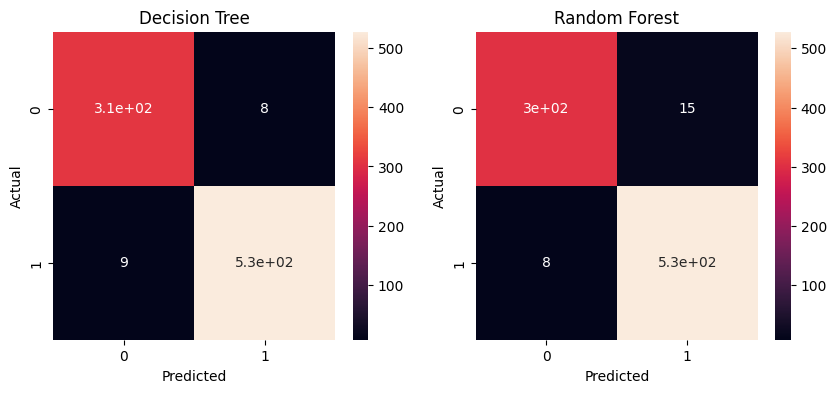

In [63]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

In [64]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Confusion Matrix Interpretation</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The confusion matrix heatmap illustrates the counts of true positives, true negatives, and misclassifications 
for both machine learning models. The <b>Decision Tree Classifier</b> shows a total of <b>17 false positives 
and false negatives</b>, while the <b>Random Forest Classifier</b> records <b>21 incorrect predictions</b>.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
This comparison indicates that the Decision Tree Classifier performs slightly better in terms of accuracy for this dataset.
</p>

<hr>

<h2 style='color:#2c3e50;'>Distribution Plot</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The distribution plot provides additional insight by visualizing how the predicted values are distributed across 
the different output classes.
</p>
"""))


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2216\505637470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2216\505637470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

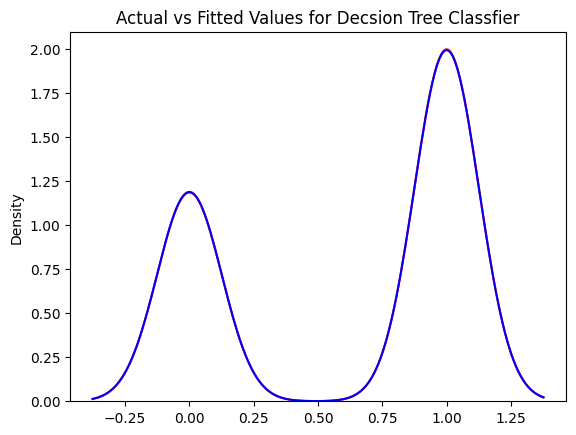

In [65]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2216\1367839858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2216\1367839858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

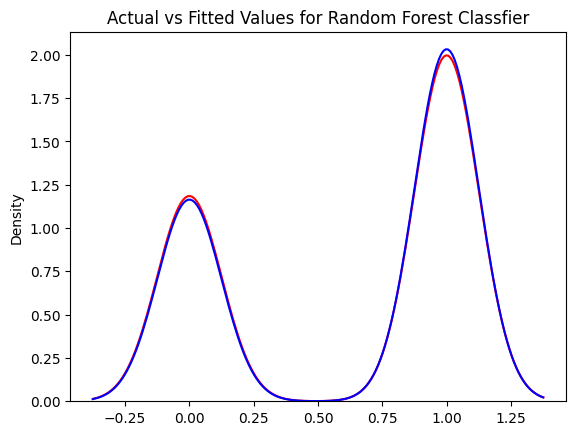

In [66]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

In [67]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Model Comparison: Distribution Analysis</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The distribution plots for both models are nearly identical, showing only minor differences in the 
distribution density of predicted and actual values for the <b>Random Forest Classifier</b>. 
In contrast, the <b>Decision Tree Classifier</b> displays a strong overlap between the predicted and actual 
value distributions, indicating a closer match.
</p>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
Therefore, the <b>Decision Tree Classifier</b> proves to be the better model for this dataset.
</p>

<h3 style='color:#2c3e50;'>Classification Report</h3>
"""))


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9148244625926969
Mean Squared Error:  0.01990632318501171
Mean Absolute Error:  0.01990632318501171


R2 score:  0.8847625082136487
Mean Squared Error:  0.026932084309133488
Mean Absolute Error:  0.026932084309133488


In [70]:
from IPython.display import display, HTML

display(HTML("""
<h2 style="color:#2c3e50;">Conclusion</h2>

<p style="font-size:15px; line-height:1.7; text-align:justify;">
Based on all metrics, graphs, and reports, the <b>Decision Tree Classifier</b> emerges as the better machine learning model 
for predicting loan approval status.
</p>

<h3 style="color:#2c3e50;">Important Factors Influencing Loan Approval</h3>
<ul style="font-size:15px; line-height:1.7;">
    <li><b>CIBIL Score:</b> Higher scores significantly increase approval chances.</li>
    <li><b>Number of Dependents:</b> More dependents decrease the likelihood of approval.</li>
    <li><b>Assets:</b> Greater movable and immovable assets improve approval probability.</li>
    <li><b>Loan Amount & Tenure:</b> Higher loan amounts and shorter tenure correlate with higher approval rates.</li>
</ul>

<h3 style="color:#2c3e50;">Model Comparison</h3>
<p style="font-size:15px; line-height:1.7; text-align:justify;">
Two machine learning models were evaluated:
</p>
<ul style="font-size:15px; line-height:1.7;">
    <li><b>Decision Tree Classifier:</b> 91.4% accuracy</li>
    <li><b>Random Forest Classifier:</b> 89.4% accuracy</li>
</ul>

<p style="font-size:15px; line-height:1.7; text-align:justify;">
Although both models performed exceptionally well, the <b>Decision Tree Classifier</b> delivered superior results 
and is therefore recommended for predicting loan approval outcomes.
</p>
"""))
